In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
test_data=tf.keras.preprocessing.image_dataset_from_directory("data/dataset/test",
                                                              shuffle=False,
                                                              batch_size=32,
                                                              image_size=(160,160))

Found 289 files belonging to 2 classes.


In [5]:
for i in test_data.take(1):
    print(i)

(<tf.Tensor: shape=(32, 160, 160, 3), dtype=float32, numpy=
array([[[[1.40317963e+02, 1.48317963e+02, 1.59317963e+02],
         [1.43250000e+02, 1.51250000e+02, 1.62250000e+02],
         [1.49500000e+02, 1.57500000e+02, 1.68500000e+02],
         ...,
         [2.17500000e+01, 2.57500000e+01, 2.87500000e+01],
         [1.90000000e+01, 2.30000000e+01, 2.60000000e+01],
         [1.97500000e+01, 2.37500000e+01, 2.67500000e+01]],

        [[1.41067963e+02, 1.49067963e+02, 1.60067963e+02],
         [1.43317963e+02, 1.51317963e+02, 1.62317963e+02],
         [1.49432037e+02, 1.57432037e+02, 1.68432037e+02],
         ...,
         [2.14781246e+01, 2.54781246e+01, 2.84781246e+01],
         [1.87281246e+01, 2.27281246e+01, 2.57281246e+01],
         [1.94781246e+01, 2.34781246e+01, 2.64781246e+01]],

        [[1.40683594e+02, 1.48683594e+02, 1.59683594e+02],
         [1.42933594e+02, 1.50933594e+02, 1.61933594e+02],
         [1.48796875e+02, 1.56796875e+02, 1.67796875e+02],
         ...,
         

In [7]:
model=keras.models.load_model("data/train/model")

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 160, 160, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)       

In [9]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 16) dtype=float32, numpy=
 array([[[[-0.07969545, -0.12546723,  0.14455716, -0.0257821 ,
            0.18020876, -0.0366032 ,  0.10916627,  0.06991154,
           -0.09083406,  0.05719604, -0.02047901, -0.0045172 ,
            0.12578416,  0.13705394, -0.03158829, -0.08904506],
          [ 0.163361  ,  0.04371374, -0.10038309,  0.01507386,
            0.10667216,  0.00333057,  0.1862152 ,  0.02490165,
           -0.02621218, -0.07123902, -0.03001351, -0.1520187 ,
           -0.16510692, -0.13344792, -0.17872995,  0.15372944],
          [ 0.15957905,  0.11924337,  0.00097095,  0.15843163,
            0.14743988,  0.13356224,  0.10569569, -0.11488915,
           -0.14120018,  0.08836967, -0.05654714, -0.00083577,
            0.11403327,  0.1362173 ,  0.18663613, -0.02371349]],
 
         [[-0.01659143,  0.14872807,  0.14805721, -0.16470411,
            0.05536023, -0.02212544,  0.03554862, -0.17521791,
           -0.17699707, -0.12714891, -

In [12]:
model.predict(test_data)

array([[0.16732311],
       [0.37518284],
       [0.7037272 ],
       [0.73763454],
       [0.72979295],
       [0.5044222 ],
       [0.6827819 ],
       [0.5852646 ],
       [0.54414207],
       [0.5888768 ],
       [0.2674472 ],
       [0.5777243 ],
       [0.63036704],
       [0.7176975 ],
       [0.57316595],
       [0.32966918],
       [0.4967925 ],
       [0.6384045 ],
       [0.6867484 ],
       [0.51024556],
       [0.64979804],
       [0.46718055],
       [0.34209564],
       [0.31150508],
       [0.5039161 ],
       [0.44332573],
       [0.7063569 ],
       [0.30298555],
       [0.6727762 ],
       [0.35950315],
       [0.24434528],
       [0.4351146 ],
       [0.4025171 ],
       [0.6761467 ],
       [0.38799858],
       [0.48405027],
       [0.70103633],
       [0.57616144],
       [0.61655664],
       [0.38113514],
       [0.53934187],
       [0.5101944 ],
       [0.5850733 ],
       [0.70906067],
       [0.6260254 ],
       [0.60478073],
       [0.15155408],
       [0.737

In [23]:
img="data/dataset/test/cats/cat.2003.jpg"

In [24]:
import matplotlib.pyplot as plt

In [25]:
img_data=plt.imread(img)

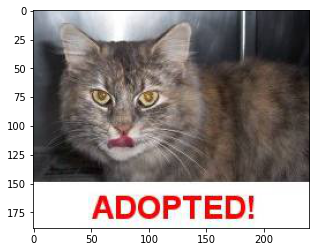

In [26]:
plt.imshow(img_data)

In [29]:
resize_image=tf.image.resize(img_data,(160,160))

In [27]:
img_data=tf.expand_dims(img_data,0)

In [22]:
img_data.shape

TensorShape([1, 189, 240, 3])

In [31]:
pred=model.predict(resize_image)

In [33]:
if pred[0][0]<0.5:
    print("Cat")

Cat


In [38]:
prediction=(model.predict(test_data).flatten())

In [43]:
df=pd.DataFrame({"image_path":test_data.file_paths,
              "prediction":prediction})

In [49]:
df.assign(image_name=df.image_path.str.split("/").str.get(3),
          predicted_label=lambda df:(df.prediction>0.5).astype(int).map({0:"Cat",1:"Dog"}))

,image_path,prediction,image_name,predicted_label
0,data/dataset/test/cats/cat.2003.jpg,0.167323,cats,Cat
1,data/dataset/test/cats/cat.2004.jpg,0.375183,cats,Cat
2,data/dataset/test/cats/cat.2006.jpg,0.703727,cats,Dog
3,data/dataset/test/cats/cat.2009.jpg,0.737635,cats,Dog
4,data/dataset/test/cats/cat.2014.jpg,0.729793,cats,Dog
...,...,...,...,...
284,data/dataset/test/dogs/dog.2475.jpg,0.735004,dogs,Dog
285,data/dataset/test/dogs/dog.2476.jpg,0.734284,dogs,Dog
286,data/dataset/test/dogs/dog.2479.jpg,0.345265,dogs,Cat
287,data/dataset/test/dogs/dog.2485.jpg,0.652630,dogs,Dog


In [55]:
df=df.assign(image_name=df.image_path.str.split("/").str.get(3),
          predicted_label=lambda df:(df.prediction>0.5).astype(int).map({idx:classname for idx,classname in enumerate(test_data.class_names)}))

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(df.image_name,df.predicted_label)

0.5674740484429066

In [62]:
(df.predicted_label==df.image_name).mean()

0.5674740484429066

In [63]:
from sklearn import metrics

In [71]:
df.image_name.map({"cats":0,"dogs":1})

0      0
1      0
2      0
3      0
4      0
      ..
284    1
285    1
286    1
287    1
288    1
Name: image_name, Length: 289, dtype: int64

In [72]:
metrics.average_precision_score(df.image_name.map({"cats":0,"dogs":1}),prediction)

0.7237030663153378

In [74]:
precision, recall, prc_thresholds = metrics.precision_recall_curve(df.image_name.map({"cats":0,"dogs":1}),prediction)

In [76]:
metrics.roc_curve(df.image_name.map({"cats":0,"dogs":1}),prediction)

(array([0.        , 0.        , 0.        , 0.00641026, 0.00641026,
        0.01282051, 0.01282051, 0.01923077, 0.01923077, 0.02564103,
        0.02564103, 0.03205128, 0.03205128, 0.03846154, 0.03846154,
        0.04487179, 0.04487179, 0.05128205, 0.05128205, 0.07051282,
        0.07051282, 0.08974359, 0.08974359, 0.1025641 , 0.1025641 ,
        0.10897436, 0.10897436, 0.13461538, 0.13461538, 0.14102564,
        0.14102564, 0.16666667, 0.16666667, 0.19230769, 0.19230769,
        0.19871795, 0.19871795, 0.21153846, 0.21153846, 0.23076923,
        0.23076923, 0.24358974, 0.24358974, 0.25      , 0.25      ,
        0.26923077, 0.26923077, 0.28205128, 0.28205128, 0.28846154,
        0.28846154, 0.32051282, 0.32051282, 0.3525641 , 0.3525641 ,
        0.35897436, 0.35897436, 0.36538462, 0.36538462, 0.37179487,
        0.37179487, 0.38461538, 0.38461538, 0.40384615, 0.40384615,
        0.41025641, 0.41025641, 0.49358974, 0.49358974, 0.54487179,
        0.54487179, 0.55128205, 0.55128205, 0.56

In [78]:
metrics.roc_auc_score(df.image_name, df.predicted_label)

ValueError: could not convert string to float: 'cats'